In [1]:
import tensorflow as tf
import numpy as np

In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
import os

In [3]:
train_dir='tomato/train'
test_dir='tomato/val'

In [4]:
#classes for training
for i in os.listdir("tomato/train/"):
    print(i)

FileNotFoundError: [WinError 3] The system cannot find the path specified: 'tomato/train/'

In [5]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1./255,
                                    shear_range=0.2,
                                    zoom_range=0.2,
                                    horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=(128, 128),
                                                    batch_size=64,
                                                    class_mode='categorical')
validation_generator =  test_datagen.flow_from_directory( test_dir,
                                                          target_size=(128, 128),
                                                          batch_size=64,
                                                          class_mode='categorical')

Found 10000 images belonging to 10 classes.
Found 1000 images belonging to 10 classes.


In [10]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.optimizers import Adam
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32,(5,5),input_shape=(128,128,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(3,3)),
    tf.keras.layers.Conv2D(32,(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
#    tf.keras.layers.Conv2D(512,(3,3),activation='relu'),
#    tf.keras.layers.MaxPooling2D(2,2),
#    tf.keras.layers.Conv2D(16,(3,3),activation='relu'),
#    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])
model.compile(loss='categorical_crossentropy',
              optimizer=Adam(lr=0.001),
              metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 124, 124, 32)      2432      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 41, 41, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 39, 39, 32)        9248      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 19, 19, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 17, 17, 64)        18496     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 4096)             

In [11]:
classes=train_generator.class_indices 
classes

{'Tomato___Bacterial_spot': 0,
 'Tomato___Early_blight': 1,
 'Tomato___Late_blight': 2,
 'Tomato___Leaf_Mold': 3,
 'Tomato___Septoria_leaf_spot': 4,
 'Tomato___Spider_mites Two-spotted_spider_mite': 5,
 'Tomato___Target_Spot': 6,
 'Tomato___Tomato_Yellow_Leaf_Curl_Virus': 7,
 'Tomato___Tomato_mosaic_virus': 8,
 'Tomato___healthy': 9}

In [12]:
history=model.fit(train_generator,
                   steps_per_epoch=train_generator.n//train_generator.batch_size,
                   epochs=20,
                   validation_data=validation_generator,
                   validation_steps=validation_generator.n//validation_generator.batch_size)
model.save("my_model.h5")

Epoch 1/20
156/156 [==============================] - 209s 1s/step - loss: 1.5929 - accuracy: 0.4242 - val_loss: 1.1082 - val_accuracy: 0.6104
Epoch 2/20
156/156 [==============================] - 121s 778ms/step - loss: 0.8405 - accuracy: 0.7024 - val_loss: 1.1289 - val_accuracy: 0.6396
Epoch 3/20
156/156 [==============================] - 124s 798ms/step - loss: 0.6124 - accuracy: 0.7826 - val_loss: 0.5383 - val_accuracy: 0.7948
Epoch 4/20
156/156 [==============================] - 123s 788ms/step - loss: 0.5268 - accuracy: 0.8139 - val_loss: 0.7054 - val_accuracy: 0.7698
Epoch 5/20
156/156 [==============================] - 123s 786ms/step - loss: 0.4409 - accuracy: 0.8407 - val_loss: 0.6434 - val_accuracy: 0.7844
Epoch 6/20
156/156 [==============================] - 126s 806ms/step - loss: 0.4021 - accuracy: 0.8580 - val_loss: 0.7293 - val_accuracy: 0.7604
Epoch 7/20
156/156 [==============================] - 124s 796ms/step - loss: 0.3672 - accuracy: 0.8670 - val_loss: 0.7254 - va

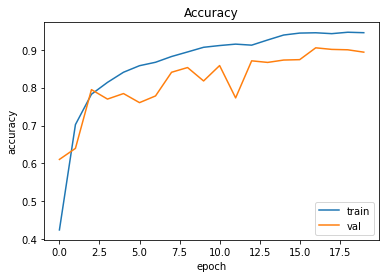

In [20]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train','val'],loc='lower right')
plt.show()

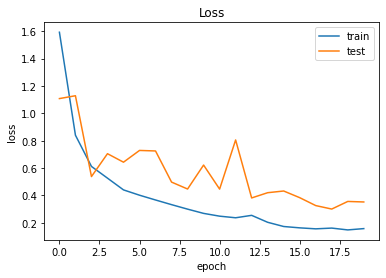

In [21]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','test'],loc='upper right')
plt.show()